In [3]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

In [19]:
class Grid:
    def __init__(self):
        self.grid = np.array([
            ['S', '▉', '.', '.', '.'],
            ['.', '▉', '.', '▉', '.'],
            ['.', '.', '.', '.', '.'],
            ['.', '▉', '▉', '.', '.'],
            ['.', '.', '.', '.', 'G']
        ])
        self.actions = ['↑', '↓', '←', '→']
        self.effects = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        self.start = (0, 0)
        self.finish = (4, 4)
        self.state = self.start
        self.n_rows, self.n_cols = self.grid.shape

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action_idx):
        x, y = self.state
        dx, dy = self.effects[action_idx]
        new_x, new_y = x + dx, y + dy

        if new_x < 0 or new_x >= self.n_rows or new_y < 0 or new_y >= self.n_cols:
            return self.state, -5, False

        if self.grid[new_x, new_y] == '▉':
            return self.state, -5, False

        self.state = (new_x, new_y)

        if (new_x, new_y) == self.finish:
            return self.state, 10, True
        return self.state, -1, False

    def render(self):
        grid_copy = np.copy(self.grid)
        x, y = self.state
        grid_copy[x, y] = '🤖'
        for row in grid_copy:
            print(' '.join(row))
        print()

In [20]:
alpha = 0.1  #Скорость обучения
gamma = 0.9  #Коэффициент дисконтирования
epsilon = 0.1  #Вероятность случайного действия
episodes = 1000  #Количество эпизодов

table = np.zeros((5, 5, 4))  #[x, y, action]

In [21]:
env = Grid()
rewards_per_episode = []

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        if np.random.rand() < epsilon:
            action = np.random.randint(4)
        else:
            action = np.argmax(table[state[0], state[1]])

        next_state, reward, done = env.step(action)
        total_reward += reward

        table[state[0], state[1], action] += alpha * (
            reward + gamma * np.max(table[next_state[0], next_state[1]]) -
            table[state[0], state[1], action]
        )
        state = next_state

    rewards_per_episode.append(total_reward)

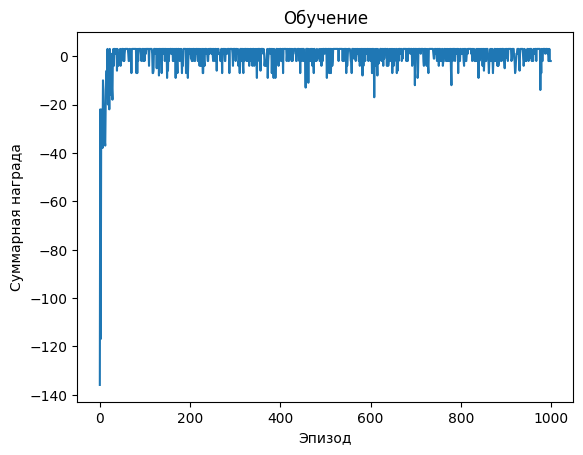

In [22]:
plt.plot(rewards_per_episode)
plt.xlabel('Эпизод')
plt.ylabel('Суммарная награда')
plt.title('Обучение')
plt.show()

In [24]:
state = env.reset()
done = False
env.render()

while not done:
    action = np.argmax(table[state[0], state[1]])
    state, i, done = env.step(action)
    env.render()
    sleep(0.5)

🤖 ▉ . . .
. ▉ . ▉ .
. . . . .
. ▉ ▉ . .
. . . . G

S ▉ . . .
🤖 ▉ . ▉ .
. . . . .
. ▉ ▉ . .
. . . . G

S ▉ . . .
. ▉ . ▉ .
🤖 . . . .
. ▉ ▉ . .
. . . . G

S ▉ . . .
. ▉ . ▉ .
. 🤖 . . .
. ▉ ▉ . .
. . . . G

S ▉ . . .
. ▉ . ▉ .
. . 🤖 . .
. ▉ ▉ . .
. . . . G

S ▉ . . .
. ▉ . ▉ .
. . . 🤖 .
. ▉ ▉ . .
. . . . G

S ▉ . . .
. ▉ . ▉ .
. . . . 🤖
. ▉ ▉ . .
. . . . G

S ▉ . . .
. ▉ . ▉ .
. . . . .
. ▉ ▉ . 🤖
. . . . G

S ▉ . . .
. ▉ . ▉ .
. . . . .
. ▉ ▉ . .
. . . . 🤖

